In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanicTrainDf = pd.read_csv("train.csv")

In [3]:
titanicTestDf = pd.read_csv("test.csv")

In [4]:
titanicTrainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanicTestDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanicTrainDf.shape

(891, 12)

In [7]:
titanicTestDf.shape

(418, 11)

In [8]:
titanicTrainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanicTestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
titanicTrainDf.drop(columns=['Ticket', 'Fare', 'Cabin'], inplace=True)
titanicTestDf.drop(columns=['Ticket', 'Fare', 'Cabin'], inplace=True)

In [11]:
YOUNG, MIDDLEAGED, SENIOR, UNKNOWN = 0, 1, 2, 3
titanicTrainDf['Age'] = titanicTrainDf['Age'].apply(lambda x: YOUNG if (x <= 20) else MIDDLEAGED if (x <= 50) else SENIOR if ( x <= 100 ) else UNKNOWN)
titanicTrainDf = titanicTrainDf.rename( columns= {'Age': 'Age Group'} )

titanicTestDf['Age'] = titanicTestDf['Age'].apply(lambda x: YOUNG if (x <= 20) else MIDDLEAGED if (x <= 50) else SENIOR if ( x <= 100 ) else UNKNOWN)
titanicTestDf = titanicTestDf.rename( columns= {'Age': 'Age Group'} )

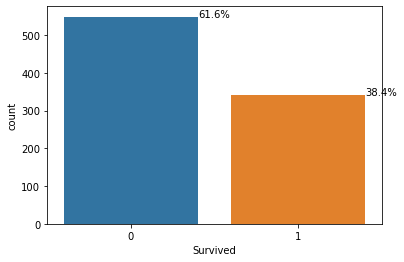

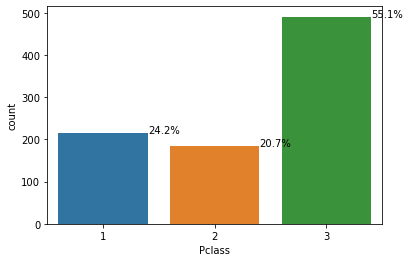

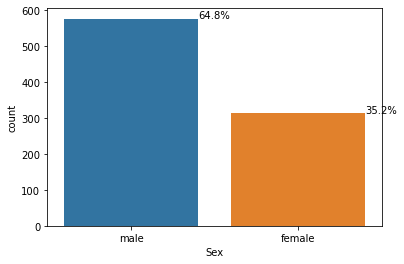

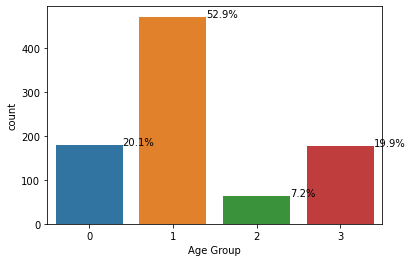

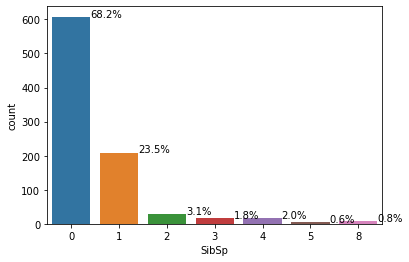

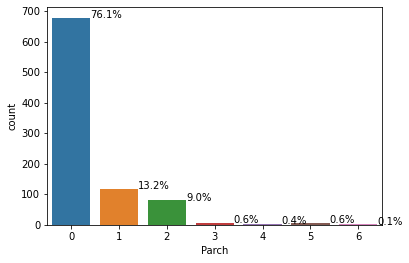

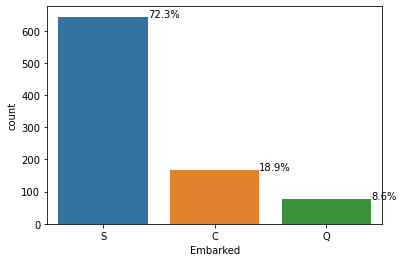

In [12]:
total = titanicTrainDf.shape[0]
for (col, _) in titanicTrainDf.iteritems(): 
    if ( ( col != 'PassengerId' ) and ( col != 'Name' ) ):
        fig, axis = plt.subplots()
        ax = sns.countplot(x = col, data = titanicTrainDf)

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y) )

        plt.show()

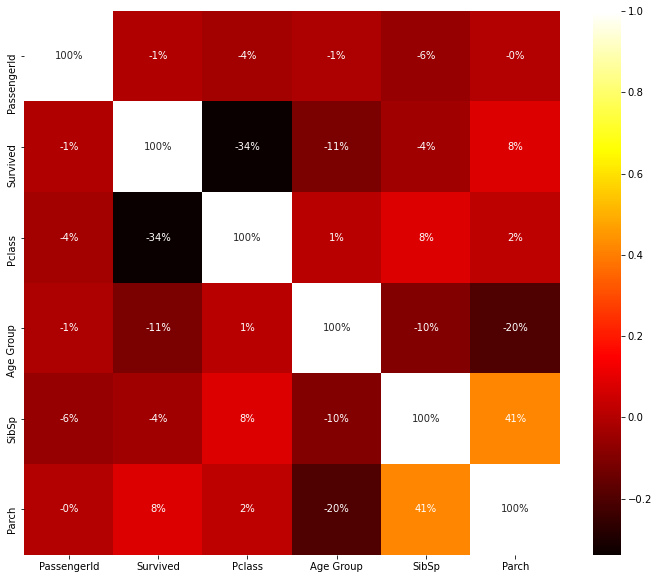

In [13]:
#Lets visualize how correlated the features in the dataset are
corr = titanicTrainDf.corr()

#plot heat map
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt ='.0%',cmap="hot")
plt.show()

<AxesSubplot:xlabel='Age Group'>

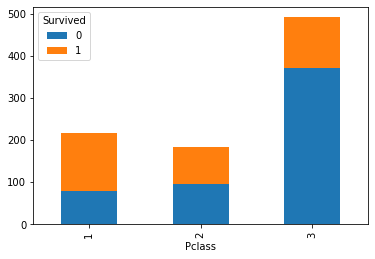

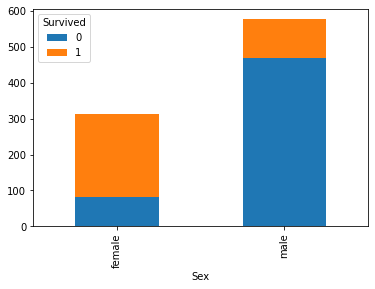

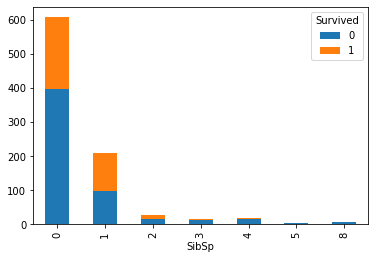

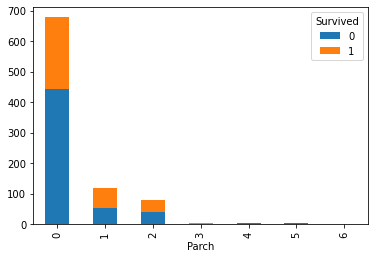

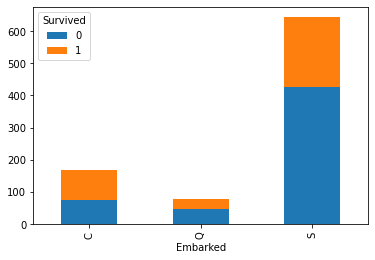

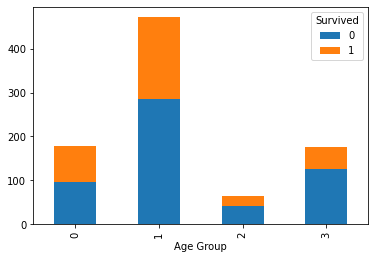

In [14]:
titanicTrainDf.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', stacked=True)
titanicTrainDf.groupby(['Sex','Survived']).size().unstack().plot(kind='bar', stacked=True)
titanicTrainDf.groupby(['SibSp','Survived']).size().unstack().plot(kind='bar', stacked=True)
titanicTrainDf.groupby(['Parch','Survived']).size().unstack().plot(kind='bar', stacked=True)
titanicTrainDf.groupby(['Embarked','Survived']).size().unstack().plot(kind='bar', stacked=True)
titanicTrainDf.groupby(['Age Group','Survived']).size().unstack().plot(kind='bar', stacked=True)

In [15]:
titanicTrainDf['Embarked'] = titanicTrainDf['Embarked'].fillna('U')
titanicTrainDf = pd.get_dummies(titanicTrainDf, columns=['Embarked'])

titanicTestDf['Embarked'] = titanicTestDf['Embarked'].fillna('U')
titanicTestDf = pd.get_dummies(titanicTestDf, columns=['Embarked'])

In [16]:
titanicTrainDf

,PassengerId,Survived,Pclass,Name,Sex,Age Group,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3,1,2,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,1,0,0,0


In [17]:
titanicTestDf

,PassengerId,Pclass,Name,Sex,Age Group,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,2,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,3,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,1,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,1,0,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,3,0,0,0,0,1


In [18]:
titanicTrainDf = pd.get_dummies(titanicTrainDf, columns=['Sex'])
titanicTestDf = pd.get_dummies(titanicTestDf, columns=['Sex'])

In [19]:
titanicTrainDf = titanicTrainDf[['PassengerId', 'Name', 'Pclass', 'Age Group', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_U', 'Survived']]
titanicTestDf['Survived'] = 0
titanicTestDf['Embarked_U'] = 0
titanicTestDf = titanicTestDf[['PassengerId', 'Name', 'Pclass', 'Age Group', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_U', 'Survived']]

In [20]:
titanicTrainDf['Survived'] = titanicTrainDf['Survived'].astype(bool)
titanicTrainDf['Sex_female'] = titanicTrainDf['Sex_female'].astype(bool)
titanicTrainDf['Sex_male'] = titanicTrainDf['Sex_male'].astype(bool)
titanicTrainDf['Embarked_C'] = titanicTrainDf['Embarked_C'].astype(bool)
titanicTrainDf['Embarked_Q'] = titanicTrainDf['Embarked_Q'].astype(bool)
titanicTrainDf['Embarked_S'] = titanicTrainDf['Embarked_S'].astype(bool)
titanicTrainDf['Embarked_U'] = titanicTrainDf['Embarked_U'].astype(bool)

titanicTestDf['Survived'] = titanicTestDf['Survived'].astype(bool)
titanicTestDf['Sex_female'] = titanicTestDf['Sex_female'].astype(bool)
titanicTestDf['Sex_male'] = titanicTestDf['Sex_male'].astype(bool)
titanicTestDf['Embarked_C'] = titanicTestDf['Embarked_C'].astype(bool)
titanicTestDf['Embarked_Q'] = titanicTestDf['Embarked_Q'].astype(bool)
titanicTestDf['Embarked_S'] = titanicTestDf['Embarked_S'].astype(bool)
titanicTestDf['Embarked_U'] = titanicTestDf['Embarked_U'].astype(bool)

In [21]:
titanicTrainDf.head()

,PassengerId,Name,Pclass,Age Group,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Survived
0,1,"Braund, Mr. Owen Harris",3,1,1,0,False,True,False,False,True,False,False
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,True,False,True,False,False,False,True
2,3,"Heikkinen, Miss. Laina",3,1,0,0,True,False,False,False,True,False,True
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,True,False,False,False,True,False,True
4,5,"Allen, Mr. William Henry",3,1,0,0,False,True,False,False,True,False,False


In [22]:
titanicTestDf.head()

,PassengerId,Name,Pclass,Age Group,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Survived
0,892,"Kelly, Mr. James",3,1,0,0,False,True,False,True,False,False,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",3,1,1,0,True,False,False,False,True,False,False
2,894,"Myles, Mr. Thomas Francis",2,2,0,0,False,True,False,True,False,False,False
3,895,"Wirz, Mr. Albert",3,1,0,0,False,True,False,False,True,False,False
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,1,1,1,True,False,False,False,True,False,False


In [23]:
titanicTrainDf.shape

(891, 13)

In [24]:
titanicTestDf.shape

(418, 13)

In [25]:
titanicTrainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Name         891 non-null    object
 2   Pclass       891 non-null    int64 
 3   Age Group    891 non-null    int64 
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Sex_female   891 non-null    bool  
 7   Sex_male     891 non-null    bool  
 8   Embarked_C   891 non-null    bool  
 9   Embarked_Q   891 non-null    bool  
 10  Embarked_S   891 non-null    bool  
 11  Embarked_U   891 non-null    bool  
 12  Survived     891 non-null    bool  
dtypes: bool(7), int64(5), object(1)
memory usage: 48.0+ KB


In [26]:
titanicTestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Name         418 non-null    object
 2   Pclass       418 non-null    int64 
 3   Age Group    418 non-null    int64 
 4   SibSp        418 non-null    int64 
 5   Parch        418 non-null    int64 
 6   Sex_female   418 non-null    bool  
 7   Sex_male     418 non-null    bool  
 8   Embarked_C   418 non-null    bool  
 9   Embarked_Q   418 non-null    bool  
 10  Embarked_S   418 non-null    bool  
 11  Embarked_U   418 non-null    bool  
 12  Survived     418 non-null    bool  
dtypes: bool(7), int64(5), object(1)
memory usage: 22.6+ KB


### All EDA, data preparation is done! Let's proceed to train/model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [28]:
x = titanicTrainDf.drop(['PassengerId', 'Name', 'Survived'], axis=1)
y = titanicTrainDf['Survived']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

The accuracy score is 82.12%

              precision    recall  f1-score   support

       False       0.84      0.88      0.86       110
        True       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



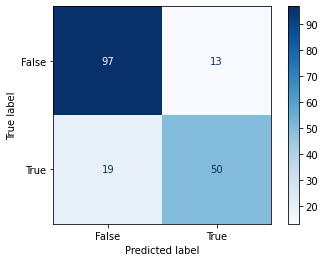

In [30]:
# Voting Classifier with hard voting 
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print("The accuracy score is {:.2f}%\n".format(accuracy_score(y_test, y_predict)*100))
print(classification_report(y_test,y_predict))

plot_confusion_matrix(rfc, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [31]:
x_test = titanicTestDf.drop(['PassengerId', 'Name', 'Survived'], axis=1)
y_predict = rfc.predict(x_test)

In [32]:
submissionDf = pd.DataFrame({"PassengerId": titanicTestDf["PassengerId"],"Survived": y_predict})
submissionDf['Survived'] = submissionDf['Survived'].astype(int)
submissionDf.to_csv('titanic.csv', index=False)